In [2]:
import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy
import pandas as pd
import tkinter as tk

%matplotlib inline


In [3]:
vocabulary=pd.read_excel('./vocabulary20000.xlsx',header=None)#20200 words in vocabulary

vocabulary.columns=['num','words','a','b']

num=vocabulary['num']
words=vocabulary['words']

In [6]:
#词汇量范围<20000
time=50#自定义测试次数
init_num=5000#自定义初始词汇量    

global inputnumber
inputnumber=0

class App(tk.Frame):
    global inputnumber
    def __init__(self, master=None):
        
        super().__init__(master)
        self.pack()

        self.entrythingy = tk.Entry()
        self.entrythingy.pack()

        # here is the application variable
        self.contents = tk.IntVar()
        # set it to some value
        self.contents.set("")
        # tell the entry widget to watch this variable
        self.entrythingy["textvariable"] = self.contents

        # and here we get a callback when the user hits return.
        # we will have the program print out the value of the
        # application variable when the user hits return
        self.entrythingy.bind('<Key-Return>',
                              self.print_contents)

    def print_contents(self, event):
        global inputnumber
        inputnumber=int(self.contents.get())
        #np.savetxt('inputnumber.txt',intnumber)
        print("Initial Number ---->",
              self.contents.get())
        root.destroy()
        
        
root = tk.Tk()
root.resizable(False,False)
root.geometry("400x300+10+10")
root.title('请输入一个整数，您的预估词汇量3000-18000')
app = App(master=root)
app.mainloop()

print(inputnumber)

#inputnumber=np.loadtxt('inputnumber.txt')
inputnumber=int(inputnumber)
if inputnumber >3000 and inputnumber < 18000: 
    init_num=inputnumber

In [7]:
class Application(tk.Frame):
   
    def __init__(self, master=None,result=0):
        tk.Frame.__init__(self, master)
        self.pack()
        self.createWidgets()
        
        
    def createWidgets(self):
        
        self.word=tk.Button(self)
        self.word["text"]="%s"%(words[numoftest])
        self.word.pack(side="top")
        
        self.hi_yes = tk.Button(self)
        self.hi_yes["text"] = "Known\n(click me)"
        self.hi_yes["command"] = self.say_yes
        self.hi_yes.pack(side="left")
        
        self.hi_no = tk.Button(self)
        self.hi_no["text"] = "UnKnown\n(click me)"
        self.hi_no["command"] = self.say_no
        self.hi_no.pack(side="right")
        
        #self.QUIT = tk.Button(self, text="Next Word", fg="red",
        #                                    command=root.destroy)
        #self.QUIT.pack(side="bottom")
        
    
    
    def say_yes(self):
        #result=1
        global has_been_called
        has_been_called=True
        #return 1
        #print("oh! You get it")
        root.destroy()        
    def say_no(self):
        global has_been_called
        has_been_called=False 
        #result=0
        #return 0
        #print("em,try more ")
        root.destroy()




'''
numoftest=init_num+np.random.randint(1,10)
root = tk.Tk()
app = Application(master=root)
app.mainloop()

'''



has_been_called=False 
results=np.zeros((time,2))
numoftest=init_num+np.random.randint(1,50)
#numoftestorigin=1000
#result=0

for i in np.arange(time):  
    root = tk.Tk()
    #root.withdraw()
    root.resizable(False,False)
    root.geometry("400x300+10+10")
    root.title('词汇量测试%d/%d'%(i,time))
    #width=root.winfo_screenmmwidth
    #height=root.winfo_screenheight    
    #root.deiconify()
    app = Application(master=root)
    app.mainloop()
    
    if has_been_called:        
        results[i]=np.array([numoftest,1])
        numoftestorigin=numoftest
        numoftest=np.around((numoftest+numoftestorigin)/2+np.random.randint(10,100)*np.random.randint(1,10)+np.random.randint(10,50))
        numoftest=min(numoftest,19500+np.random.randint(1,100))
    else:
        results[i]=np.array([numoftest,0])
        numoftestorigin=numoftest
        numoftest=np.around((numoftest+numoftestorigin)/2-np.random.randint(10,100)*np.random.randint(1,10)-np.random.randint(10,50))
        numoftest=max(numoftest,3000+np.random.randint(1,100))      
#print(results[0:time])   
    

num.size

Your vocabulary is 8092.0


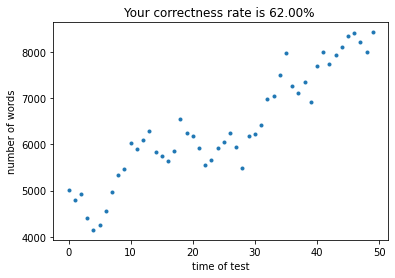

In [8]:
wordnum=results[:,0]
yesorno=results[:,1]
correct=np.sum(yesorno==1)
correctrate=correct/time
correctrateper=format(correctrate,'.2%')
vocabularynum=np.around(np.mean(wordnum[-10:]))

plt.plot(wordnum,'.') 
plt.title("Your correctness rate is %s "%correctrateper)
plt.xlabel('time of test')
plt.ylabel('number of words')
plt.savefig('vocabularyresult.png',dpi=400)
print("Your vocabulary is %s"%vocabularynum)

Text(0.5, 0, 'number of words')

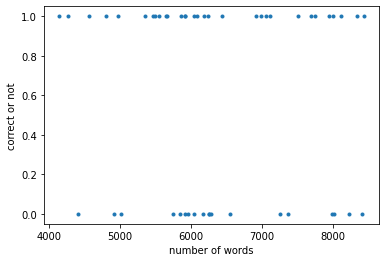

In [9]:
plt.plot(wordnum,yesorno,'.') 
plt.ylabel('correct or not')
plt.xlabel('number of words')